In [195]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.plotting.register_matplotlib_converters()
#from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

In [196]:
test_data = pd.read_csv('data-sets/test.csv')
train_data = pd.read_csv('data-sets/train.csv')

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [197]:
#print(train_data)
le = LabelEncoder()
train_data['Sex'] = le.fit_transform(train_data.Sex) #Male as 1, Female as 0
test_data['Sex'] = le.transform(test_data.Sex)       #Male as 1, Female as 0
train_data.Age = train_data.Age.fillna(train_data.Age.mean())
test_data.Age = test_data.Age.fillna(test_data.Age.mean())
test_data.Fare = test_data.Fare.fillna(test_data.Fare.mean())

train_data['Embarked'] = le.fit_transform(train_data.Embarked.astype(str))
test_data['Embarked'] = le.transform(test_data.Embarked.astype(str))

train_data.Embarked = train_data.Embarked.fillna(train_data.Embarked.mode())


train_data = train_data.drop(columns=['Name','Cabin', 'Ticket'])
test_data = test_data.drop(columns=['Name','Cabin', 'Ticket'])

###train_data['Embarked'] = le.fit_transform(train_data.Embarked.astype(str))
###test_data['Embarked'] = le.transform(test_data.Embarked.astype(str))

###df1 = test_data[test_data.isna().any(axis=1)]
#Male is 1, Female is 0
train_data.head()



##77% of Train Data contains NULL values for Cabin (687) ##
##78% of Test Data contains NULL values for Cabin (327) ##

##19% of Train Data contains NULL values for Age (177) ##
##20% of Test Data contains NULL values for Age (86) ##

#0.2% of Train Data contains NULL values for Embarked (2) ##
#0.2% of Test Data contains NULL values for Fare (1) ##
#####################################################################
####Competition Rules Dictate No Rows dropped from Test Data#########
#####################################################################

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


In [198]:
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,34.5,0,0,7.8292,1
1,893,3,0,47.0,1,0,7.0000,2
2,894,2,1,62.0,0,0,9.6875,1
3,895,3,1,27.0,0,0,8.6625,2
4,896,3,0,22.0,1,1,12.2875,2


In [199]:
train_data.Age.describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [200]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [201]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [202]:
print(train_data.shape)
print(test_data.shape)

(891, 9)
(418, 8)


In [203]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int32  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    int32  
dtypes: float64(2), int32(2), int64(5)
memory usage: 55.8 KB


In [204]:
train_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

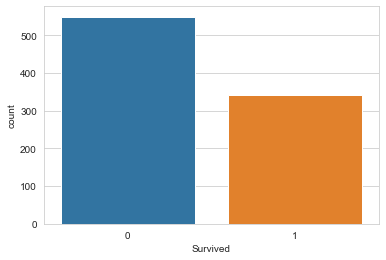

In [205]:
sns.countplot(train_data['Survived'])

In [206]:
cm = sns.light_palette("green", as_cmap=True)
corr = train_data.corr()
corr.style.set_caption('Colormaps, with a caption.').background_gradient(cmap=cm)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.033207,-0.057527,-0.001652,0.012658,0.013083
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.069809,-0.035322,0.081629,0.257307,-0.163517
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.331339,0.083081,0.018443,-0.549500,0.157112
Sex,0.042939,-0.543351,0.131900,1.000000,0.084153,-0.114631,-0.245489,-0.182333,0.104057
Age,0.033207,-0.069809,-0.331339,0.084153,1.000000,-0.232625,-0.179191,0.091566,-0.022239
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.159651,0.066654
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.216225,0.038322
Fare,0.012658,0.257307,-0.549500,-0.182333,0.091566,0.159651,0.216225,1.000000,-0.221226
Embarked,0.013083,-0.163517,0.157112,0.104057,-0.022239,0.066654,0.038322,-0.221226,1.000000


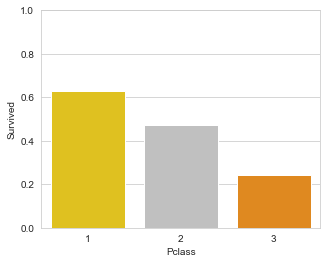

In [207]:
plt.figure(figsize=(5,4))
plt.ylim(0.0, 1.0)
plt.xlim(1, 3)
sns.set_style("whitegrid")
sns.barplot(train_data.Pclass, train_data.Survived, palette=["gold", "silver", "darkorange"], ci=None)
#sns.lineplot(train_data.Pclass, train_data.Survived)

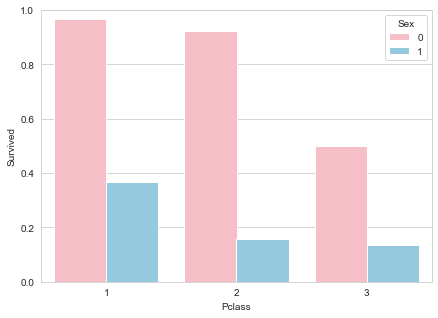

In [208]:
plt.figure(figsize=(7,5))
plt.ylim(0.0, 1.0)
plt.xlim(1, 3)
sns.set_style("whitegrid")
sns.barplot(x=train_data.Pclass, y=train_data.Survived, hue=train_data.Sex, palette=["lightpink", "skyblue"], ci=None)


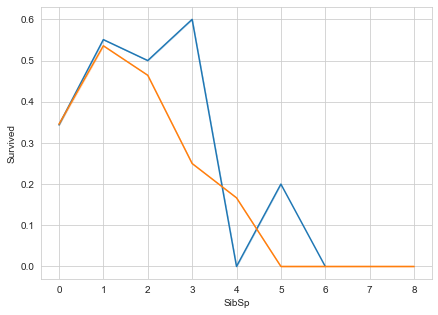

In [209]:
plt.figure(figsize=(7,5))
sns.set_style("whitegrid")
sns.lineplot(x=train_data.Parch,y=train_data.Survived, ci=0)
sns.lineplot(x=train_data.SibSp,y=train_data.Survived, ci=0)

In [210]:
df1 = train_data.Survived
train_data = train_data.drop(columns=['Survived'])

In [211]:
X_train, X_test, y_train, y_test = train_test_split(train_data, df1, test_size=0.20, random_state=0)
#X_train, X_test, y_train, y_test = train_test_split(train_data, test_data, random_state=0)
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [212]:
prediction = knn.predict(test_data)
print(prediction)

[0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0 1 0 1 1 1 0 1 0 1 0 0 1 0 0 1 0 0
 0 0 1 0 1 0 0 1 0 1 0 1 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 1 1 0 1 1 1 0 0 0 1
 1 1 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 0 1 0 1 0 1 0 1 0 1 1 0 0 1 1 1 0 0 1 0
 0 1 1 1 1 0 1 1 1 1 0 1 0 0 1 1 1 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1]


In [213]:
print(knn.score(X_test, y_test))

0.6871508379888268


In [214]:
test_data.shape

(418, 8)

In [215]:
print(knn.score(X_test, y_test))

0.6871508379888268


In [216]:
test_data.shape

(418, 8)